## <font color="blue">Problem Statement</font>

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:
Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.
 
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

<br>
<br>

## <font color="blue">Import Packages</font>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn import metrics

In [2]:
### settting max display column length
pd.set_option("display.max_column",999)

In [3]:
warnings.filterwarnings("ignore")

<br>
<br>

## <font color="blue">Reading & Understanding Data </font>

In [4]:
leads_df = pd.read_csv("../input/leadscore/Leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
### checking shape of DF
leads_df.shape

(9240, 37)

In [6]:
### checking stats of DF
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


<br>
<br>

## <font color="blue">Data Cleaning </font>

In [7]:
### creating a copy of original DF
leads_df_original = leads_df.copy()

In [8]:
### replacing all "Select" to Null
leads_df = leads_df.replace("Select" , np.nan)

In [9]:
### checking % null values
col_null_check = round((leads_df.isnull().sum() * 100 / leads_df.shape[0]),2).sort_values(ascending=False)
col_null_check

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [10]:
#Check for duplicate values
leads_df.duplicated().sum()

0

In [11]:
### droppping columns with more than close to 30% of null values

cols_del = col_null_check[col_null_check >= 30].index

leads_df.drop(columns = cols_del , inplace=True)
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [12]:
### dropping columns that are not required as its index column

leads_df.drop(columns = ["Prospect ID" , "Lead Number"] , inplace=True)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


<br>
<br>

## <font color="blue">Understanding & imputing other null columns </font>

In [13]:
### columns to consider for imputing
col_null_check = round((leads_df.isnull().sum() * 100 / leads_df.shape[0]),2).sort_values(ascending=False)
col_null_check[col_null_check > 0]

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

In [14]:
### replacing Lead Source value with mode value as its a categorical column
leads_df["Lead Source"].fillna(leads_df["Lead Source"].mode()[0], inplace=True)

In [15]:
### checking % of values so that we can merge low ones into one.
leads_df["Lead Source"].value_counts(normalize=True,dropna=False)* 100

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Social Media          0.021645
Press_Release         0.021645
Live Chat             0.021645
youtubechannel        0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
NC_EDM                0.010823
blog                  0.010823
testone               0.010823
Name: Lead Source, dtype: float64

In [16]:
### converting google to Google in Lead Source column so make it same.
leads_df["Lead Source"] = leads_df["Lead Source"].replace("google","Google")

In [17]:
### lead source column to merge
to_merge = leads_df["Lead Source"].value_counts(normalize=True,dropna=False)* 100
to_merge[to_merge < 10]

Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
bing                 0.064935
Click2call           0.043290
Social Media         0.021645
Press_Release        0.021645
Live Chat            0.021645
WeLearn              0.010823
youtubechannel       0.010823
Pay per Click Ads    0.010823
welearnblog_Home     0.010823
NC_EDM               0.010823
blog                 0.010823
testone              0.010823
Name: Lead Source, dtype: float64

In [18]:
### mereging below 10% to others
leads_df["Lead Source"] = leads_df["Lead Source"].apply(lambda x: 'Others' if x in to_merge[to_merge < 10].index else x)
leads_df["Lead Source"].value_counts(normalize=True,dropna=False)* 100

Google            31.482684
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Others             9.512987
Name: Lead Source, dtype: float64

In [19]:
### replacing Last Activity value with mode value as its a categorical column

leads_df["Last Activity"].fillna(leads_df["Last Activity"].mode()[0], inplace=True)

In [20]:
### checking % of values so that we can merge low ones into one.
leads_df["Last Activity"].value_counts(normalize=True,dropna=False)* 100

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Marked Spam                0.021645
Email Received                   0.021645
Resubscribed to emails           0.010823
Visited Booth in Tradeshow       0.010823
Name: Last Activity, dtype: float64

In [21]:
### lead source column to merge
to_merge = leads_df["Last Activity"].value_counts(normalize=True,dropna=False)* 100

### mereging below 10% to others
leads_df["Last Activity"] = leads_df["Last Activity"].apply(lambda x: 'Others' if x in to_merge[to_merge < 10].index else x)
leads_df["Last Activity"].value_counts(normalize=True,dropna=False)* 100

Email Opened               38.311688
SMS Sent                   29.707792
Others                     21.450216
Olark Chat Conversation    10.530303
Name: Last Activity, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

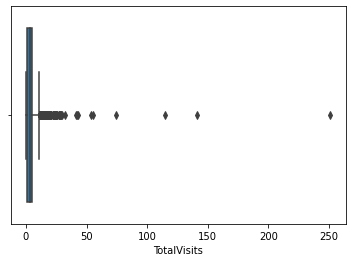

In [22]:
#### checking outliers in TotalVisits column

sns.boxplot(leads_df["TotalVisits"])

In [23]:
### replacing TotalVisits value with median value as it has outliers

leads_df["TotalVisits"].fillna(leads_df["TotalVisits"].median(), inplace=True)

<AxesSubplot:xlabel='Page Views Per Visit'>

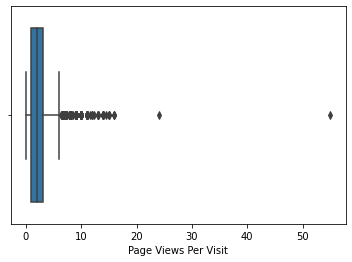

In [24]:
#### checking outliers in Page Views Per Visit column

sns.boxplot(leads_df["Page Views Per Visit"])

In [25]:
### replacing Page Views Per Visit value with median value as it has outliers

leads_df["Page Views Per Visit"].fillna(leads_df["Page Views Per Visit"].median(), inplace=True)

In [26]:
### checking values in What is your current occupation
leads_df["What is your current occupation"].value_counts(normalize=True,dropna=False)* 100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [27]:
### converting null to not specified
leads_df["What is your current occupation"].replace(np.nan , "Not Specified" , inplace=True)
leads_df["What is your current occupation"].value_counts(dropna=False , normalize=True)

Unemployed              0.606061
Not Specified           0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [28]:
### mereging below 5% to others
to_merge = ["Student" ,"Housewife", "Businessman"]
leads_df["What is your current occupation"] = leads_df["What is your current occupation"].apply(lambda x: 'Other' if x in to_merge else x)
leads_df["What is your current occupation"].value_counts(dropna=False , normalize=True)

Unemployed              0.606061
Not Specified           0.291126
Working Professional    0.076407
Other                   0.026407
Name: What is your current occupation, dtype: float64

In [29]:
### checking values in What matters most to you in choosing a course
leads_df["What matters most to you in choosing a course"].value_counts(normalize=True,dropna=False)* 100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [30]:
### converting null to not specified
leads_df["What matters most to you in choosing a course"].replace(np.nan , "Not Specified" , inplace=True)
leads_df["What matters most to you in choosing a course"].value_counts(dropna=False , normalize=True) * 100

Better Career Prospects      70.649351
Not Specified                29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [31]:
### mereging below 1% to others
to_merge = ["Flexibility & Convenience"]
leads_df["What matters most to you in choosing a course"] = leads_df["What matters most to you in choosing a course"].apply(lambda x: 'Other' if x in to_merge else x)
leads_df["What matters most to you in choosing a course"].value_counts(dropna=False , normalize=True) * 100

Better Career Prospects    70.649351
Not Specified              29.318182
Other                       0.032468
Name: What matters most to you in choosing a course, dtype: float64

In [32]:
### checking % values in Country
leads_df["Country"].value_counts(normalize=True,dropna=False)* 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Nigeria                  0.043290
South Africa             0.043290
Kuwait                   0.043290
Germany                  0.043290
Canada                   0.043290
Sweden                   0.032468
Netherlands              0.021645
Ghana                    0.021645
Italy                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Philippines              0.021645
China                    0.021645
Belgium                  0.021645
Bangladesh               0.021645
Russia        

In [33]:
### converting null to not specified
leads_df["Country"].replace(np.nan , "Not Specified" , inplace=True)
leads_df["Country"].value_counts(dropna=False , normalize=True) * 100

India                   70.259740
Not Specified           26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Nigeria                  0.043290
South Africa             0.043290
Kuwait                   0.043290
Germany                  0.043290
Canada                   0.043290
Sweden                   0.032468
Belgium                  0.021645
Italy                    0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Philippines              0.021645
China                    0.021645
Ghana                    0.021645
Bangladesh               0.021645
Denmark       

In [34]:
### mereging below 1% to others
to_merge = ["India" , "Not Specified"]
leads_df["Country"] = leads_df["Country"].apply(lambda x: 'Other' if x not in to_merge else x)
leads_df["Country"].value_counts(dropna=False , normalize=True) * 100

India            70.259740
Not Specified    26.634199
Other             3.106061
Name: Country, dtype: float64

In [35]:
### final check for any null values

col_null_check = round((leads_df.isnull().sum() * 100 / leads_df.shape[0]),2).sort_values(ascending=False)
col_null_check[col_null_check > 0]

Series([], dtype: float64)

In [36]:
### checking datatype of the columns
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [37]:
### checking distinct values in columns

for cols in leads_df.columns:
    print("Distinct Values in Column :" , cols)
    print("\n",leads_df[cols].value_counts())
    print("************************************\n\n")
    

Distinct Values in Column : Lead Origin

 Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
************************************


Distinct Values in Column : Lead Source

 Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Others             879
Name: Lead Source, dtype: int64
************************************


Distinct Values in Column : Do Not Email

 No     8506
Yes     734
Name: Do Not Email, dtype: int64
************************************


Distinct Values in Column : Do Not Call

 No     9238
Yes       2
Name: Do Not Call, dtype: int64
************************************


Distinct Values in Column : Converted

 0    5679
1    3561
Name: Converted, dtype: int64
************************************


Distinct Values in Column : TotalVisits

 0.0      2189
2.0      1680
3.0      1443
4.0      1

In [38]:
### removing columns where we have only NO values or very very low Yes. As these won't impact model
cols = ["Search","Through Recommendations","Digital Advertisement","Do Not Call" ,"Magazine","Newspaper Article","X Education Forums","Newspaper", "Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"]

leads_df.drop(columns=cols,inplace=True)

In [39]:
### checking % values in Last Notable Activity
leads_df["Last Notable Activity"].value_counts(dropna=False , normalize=True) * 100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Email Received                   0.010823
View in browser link Clicked     0.010823
Resubscribed to emails           0.010823
Approached upfront               0.010823
Form Submitted on Website        0.010823
Name: Last Notable Activity, dtype: float64

In [40]:
### Last Notable Activity column to merge
to_merge = leads_df["Last Notable Activity"].value_counts(normalize=True,dropna=False)* 100

### mereging below 10% to other
leads_df["Last Notable Activity"] = leads_df["Last Notable Activity"].apply(lambda x: 'Other' if x in to_merge[to_merge < 10].index else x)
leads_df["Last Notable Activity"].value_counts(normalize=True,dropna=False)* 100

Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
Other            9.025974
Name: Last Notable Activity, dtype: float64

In [41]:
### checking final list of columns
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Others,Not Specified,Unemployed,Better Career Prospects,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Other,Better Career Prospects,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,India,Unemployed,Better Career Prospects,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Others,India,Unemployed,Better Career Prospects,No,Modified


<br>
<br>

## <font color="blue">Converting categorical column data for ML Model preparation </font>

In [42]:
### converting all "Yes" to 1 and "No" to 0

cols = ["Do Not Email","A free copy of Mastering The Interview"]

leads_df[cols] = leads_df[cols].replace({"Yes":1,"No":0,"yes":1,"no":0})

### cnverting binary columns to int from object
leads_df[cols] = leads_df[cols].astype("int")

leads_df.head()


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Others,Not Specified,Unemployed,Better Career Prospects,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Other,Better Career Prospects,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,India,Unemployed,Better Career Prospects,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,India,Unemployed,Better Career Prospects,0,Modified


In [43]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   Country                                        9240 non-null   object 
 9   What is your current occupation                9240 

In [44]:
### converting dummy columns
cols = ["What matters most to you in choosing a course","Country","What is your current occupation","Lead Origin","Lead Source","Last Activity","Last Notable Activity"]

dummy = pd.get_dummies(leads_df[cols] ,drop_first=True)
leads_df = pd.concat([leads_df , dummy] , axis=1)
leads_df.drop(columns=cols , inplace=True)

leads_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,What matters most to you in choosing a course_Not Specified,What matters most to you in choosing a course_Other,Country_Not Specified,Country_Other,What is your current occupation_Other,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,1,2.0,1428,1.0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0


In [45]:
### getting final shape
leads_df.shape

(9240, 27)

<br>
<br>

## <font color="blue"> Checking Churn Ratio in the data</font>

In [46]:
round(leads_df.Converted.value_counts(normalize=True)* 100,2)

0    61.46
1    38.54
Name: Converted, dtype: float64

<AxesSubplot:xlabel='Converted', ylabel='count'>

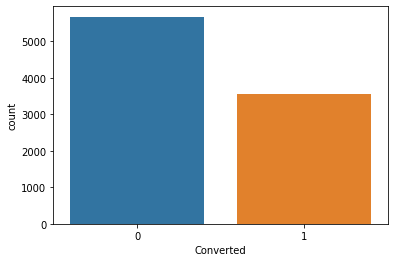

In [47]:
sns.countplot(leads_df.Converted)

<br>
<br>

## <font color="blue">Train Test Split </font>


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
leads_df_train , leads_df_test = train_test_split(leads_df , train_size=0.7 , random_state=100)

print("leads_df_train : " , leads_df_train.shape)
print("leads_df_test : " , leads_df_test.shape)


leads_df_train :  (6468, 27)
leads_df_test :  (2772, 27)


<br>
<br>

## <font color="blue">Scalling the Train & Test Data </font>

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
### scalling only the non-binary columns data Train DF

cols = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

scaler = StandardScaler()

leads_df_train[cols] = scaler.fit_transform(leads_df_train[cols])

leads_df_train[cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
1871,-0.656434,-0.885371,-1.085519
6795,0.100767,0.005716,-0.470569
3516,0.290067,-0.691418,0.070401
8105,0.290067,1.365219,1.226321
3934,-0.656434,-0.885371,-1.085519


In [52]:
### scalling only the non-binary columns data of Test DF

cols = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

leads_df_test[cols] = scaler.transform(leads_df_test[cols])

leads_df_test[cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
4269,0.857967,0.964504,2.613424
2376,-0.656434,-0.885371,-1.085519
7766,0.290067,-0.777416,1.226321
9199,-0.656434,-0.885371,-1.085519
4359,-0.656434,-0.885371,-1.085519


<br>
<br>

## <font color="blue">Creating X & Y Train and Test </font>

In [53]:
Y_Train = leads_df_train.pop("Converted")

In [54]:
X_Train = leads_df_train

In [55]:
Y_Test = leads_df_test.pop("Converted")

In [56]:
X_Test = leads_df_test

<br>
<br>

## <font color="blue">Logistic Regression Model Creation </font>

#### <font color="green">Step - 1:  RFE </font>

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [58]:
logreg = LogisticRegression()
### taking best 15 features
rfe = RFE(logreg , 15)
rfe = rfe.fit(X_Train,Y_Train)

In [59]:
### listing the RFE columns
rfe_df = pd.DataFrame(zip(X_Train.columns , rfe.support_ , rfe.ranking_) , columns=["Features" ,"Support","Ranking"])
rfe_df[rfe_df.Support == True]

,Features,Support,Ranking
0,Do Not Email,True,1
2,Total Time Spent on Website,True,1
5,What matters most to you in choosing a course_...,True,1
7,Country_Not Specified,True,1
11,What is your current occupation_Working Profes...,True,1
13,Lead Origin_Lead Add Form,True,1
14,Lead Origin_Lead Import,True,1
17,Lead Source_Olark Chat,True,1
19,Lead Source_Others,True,1
20,Last Activity_Olark Chat Conversation,True,1


<br>

#### <font color="green">Step - 2:  Build Model </font>

In [60]:
import statsmodels.api as sm

In [61]:
cols = rfe_df[rfe_df["Support"] == True].iloc[:,0]
cols

0                                          Do Not Email
2                           Total Time Spent on Website
5     What matters most to you in choosing a course_...
7                                 Country_Not Specified
11    What is your current occupation_Working Profes...
13                            Lead Origin_Lead Add Form
14                              Lead Origin_Lead Import
17                               Lead Source_Olark Chat
19                                   Lead Source_Others
20                Last Activity_Olark Chat Conversation
21                                 Last Activity_Others
22                               Last Activity_SMS Sent
23                       Last Notable Activity_Modified
24                          Last Notable Activity_Other
25                       Last Notable Activity_SMS Sent
Name: Features, dtype: object

<br>

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
### function to create logistic model and check p-value and VIF

def create_Logistic_model(y_train, x_train , cols):
    ## create log model
    x_train_sm  = sm.add_constant(x_train[cols])
    logsm = sm.GLM(y_train , x_train_sm , family=sm.families.Binomial())
    res = logsm.fit()
    print(res.summary())
    
    ## create VIF list
    vif = pd.DataFrame()
    vif["Features"] = x_train_sm.columns
    vif["VIF"] = [variance_inflation_factor(x_train_sm.values , i) for i in range(x_train_sm.shape[1])]
    vif["VIF"] = round(vif["VIF"],2)
    vif = vif.sort_values(by="VIF" , ascending=False)
    print("\n" , vif)

<br>

In [64]:
### model 1

create_Logistic_model(Y_Train,X_Train,cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.3
Date:                Thu, 15 Jul 2021   Deviance:                       5256.5
Time:                        16:07:58   Pearson chi2:                 6.95e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

In [65]:
### model 2

## removing column:Lead Source_Others Add Form with very high p-value > 0.05
cols = cols[cols != "Lead Source_Others"]

create_Logistic_model(Y_Train,X_Train,cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.0
Date:                Thu, 15 Jul 2021   Deviance:                       5258.0
Time:                        16:07:59   Pearson chi2:                 6.93e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

In [66]:
### model 3

## removing column:Lead Origin_Lead Import with very high p-value > 0.05
cols = cols[cols != "Lead Origin_Lead Import"]

create_Logistic_model(Y_Train,X_Train,cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.4
Date:                Thu, 15 Jul 2021   Deviance:                       5258.7
Time:                        16:07:59   Pearson chi2:                 6.92e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

In [67]:
### model 4

## removing column:Country_Not Specified  Received with very high p-value > 0.05
cols = cols[cols != "Country_Not Specified"]

create_Logistic_model(Y_Train,X_Train,cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.2
Date:                Thu, 15 Jul 2021   Deviance:                       5260.4
Time:                        16:07:59   Pearson chi2:                 6.91e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

In [68]:
### model 5

## removing column:Last Notable Activity_SMS Sent a Phone Conversation with very high VIF > 5
cols = cols[cols != "Last Notable Activity_SMS Sent"]

create_Logistic_model(Y_Train,X_Train,cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.2
Date:                Thu, 15 Jul 2021   Deviance:                       5270.5
Time:                        16:08:00   Pearson chi2:                 6.81e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

In [69]:
### model 6

## removing column:Last Notable Activity_Other with very high p-value > 0.05
cols = cols[cols != "Last Notable Activity_Other"]

create_Logistic_model(Y_Train,X_Train,cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.4
Date:                Thu, 15 Jul 2021   Deviance:                       5272.8
Time:                        16:08:00   Pearson chi2:                 6.80e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

#### <font color="green"> Finally we got the final model where p-value of the features are below 0.05 and VIF below 5 </font>

<br>

#### <font color="green">Step - 3:  Predict From Model </font>

In [70]:
## create final logistic model
X_Train_sm  = sm.add_constant(X_Train[cols])
logsm = sm.GLM(Y_Train , X_Train_sm , family=sm.families.Binomial())
res = logsm.fit()

In [71]:
### predict Y and round % to 2 decimal value
Y_Train_Predict = res.predict(X_Train_sm)
Y_Train_Predict = round(Y_Train_Predict , 2)
Y_Train_Predict.head()

1871    0.35
6795    0.29
3516    0.40
8105    0.84
3934    0.21
dtype: float64

In [72]:
### making the dataframe to check model stregth 

Y_Train_Predict_Final = pd.DataFrame({"Churn_Original": Y_Train.values , "Churn_Probability": Y_Train_Predict})
Y_Train_Predict_Final.head()

,Churn_Original,Churn_Probability
1871,0,0.35
6795,0,0.29
3516,0,0.40
8105,0,0.84
3934,0,0.21


In [73]:
Y_Train_Predict_Final["Customer_ID"] = Y_Train.index
Y_Train_Predict_Final = Y_Train_Predict_Final[["Customer_ID" , "Churn_Original" , "Churn_Probability"]]

Y_Train_Predict_Final.head()

,Customer_ID,Churn_Original,Churn_Probability
1871,1871,0,0.35
6795,6795,0,0.29
3516,3516,0,0.40
8105,8105,0,0.84
3934,3934,0,0.21


<br>

#### <font color="green">Step - 4:  Checking Matrix table for different threshold </font>

In [74]:
### will calculate and return for each cutoff prob what will be the matix

def model_strength(predict_df):
    model_strength_df = pd.DataFrame(columns=["Probability_Threshold","Sensivity","Specificity","Accuracy","FPR","TPR","Precision","Recall","F1_score"])
    prob_list = [float(x)/100 for x in range(100)]
    for prob in prob_list:
        predict_df["Churn_Predicted"] = predict_df["Churn_Probability"].map(lambda x: 1 if x > prob else 0)
        confusion = metrics.confusion_matrix(predict_df["Churn_Original"] ,predict_df["Churn_Predicted"])
        
        sensivity = round((confusion[1,1]  / (confusion[1,0] + confusion[1,1])) , 2)
        specificity = round((confusion[0,0]  / (confusion[0,0] + confusion[0,1])) , 2)
        accuracy = round(((confusion[0,0] + confusion[1,1]) / (confusion[0,0] +confusion[0,1]+confusion[1,1]+ confusion[0,1])) , 2)
        FPR = 1 - specificity
        TPR = sensivity
        
        precision = round((confusion[1,1] / (confusion[0,1] + confusion[1,1])) , 2)
        recall = round((confusion[1,1] / (confusion[1,0] + confusion[1,1])) , 2)
        
        F1_score = round((2 * ((precision * recall) / (precision + recall))),2)
        
        model_strength_df = model_strength_df.append({"Probability_Threshold":prob, "Sensivity":sensivity, "Specificity": specificity ,"Accuracy":accuracy ,"FPR": FPR,"TPR":TPR ,"Precision":precision,"Recall":recall ,"F1_score":F1_score} , ignore_index=True)
        
    return model_strength_df
    

In [75]:
### checking model metrices now
pd.set_option('expand_frame_repr', False)
### settting max display column length
pd.set_option("display.max_rows",101)
model_strength_df = model_strength(Y_Train_Predict_Final)
print(model_strength_df)
pd.set_option("display.max_rows",11)

    Probability_Threshold  Sensivity  Specificity  Accuracy   FPR   TPR  Precision  Recall  F1_score
0                    0.00       1.00         0.00      0.24  1.00  1.00       0.38    1.00      0.55
1                    0.01       1.00         0.03      0.25  0.97  1.00       0.39    1.00      0.56
2                    0.02       1.00         0.07      0.27  0.93  1.00       0.40    1.00      0.57
3                    0.03       1.00         0.10      0.29  0.90  1.00       0.41    1.00      0.58
4                    0.04       0.99         0.19      0.33  0.81  0.99       0.43    0.99      0.60
5                    0.05       0.99         0.21      0.34  0.79  0.99       0.44    0.99      0.61
6                    0.06       0.99         0.26      0.37  0.74  0.99       0.45    0.99      0.62
7                    0.07       0.98         0.32      0.40  0.68  0.98       0.47    0.98      0.64
8                    0.08       0.98         0.37      0.43  0.63  0.98       0.49    0.98 

<br>

#### <font color="green">Step - 5:  Create Sensivity , Specificity & Accuracy Curve</font>

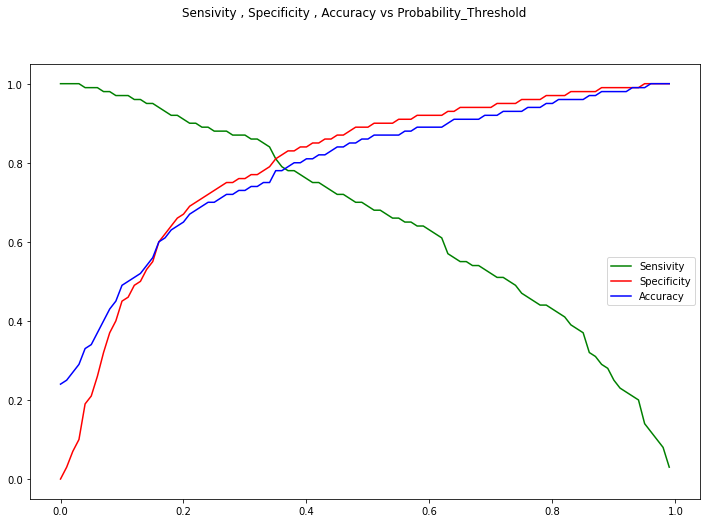

In [76]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Sensivity , Specificity , Accuracy vs Probability_Threshold')
plt.plot(model_strength_df["Probability_Threshold"] , model_strength_df["Sensivity"] , "g-" ,  label='Sensivity')
plt.plot(model_strength_df["Probability_Threshold"] , model_strength_df["Specificity"] , "r-" ,  label='Specificity')
plt.plot(model_strength_df["Probability_Threshold"] , model_strength_df["Accuracy"] ,"b-",  label='Accuracy')
plt.legend()
plt.show()

#### <font color="green">Step - 6:  Precision vs Recall curve</font>

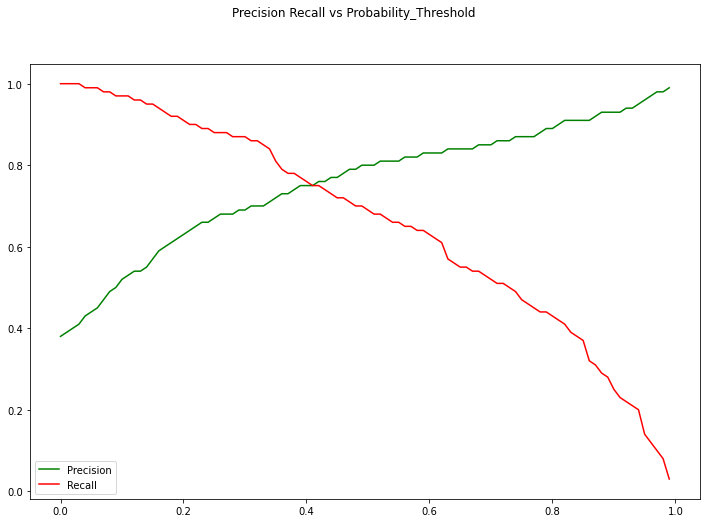

In [77]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Precision Recall vs Probability_Threshold')
plt.plot(model_strength_df["Probability_Threshold"] , model_strength_df["Precision"] , "g-" ,  label='Precision')
plt.plot(model_strength_df["Probability_Threshold"] , model_strength_df["Recall"] , "r-" ,  label='Recall')
plt.legend()
plt.show()

<br>

#### <font color="green">Step - 7:  ROC Curve</font>

In [78]:
def draw_ROC(actual,predicted):
    fpr,tpr,threshold = metrics.roc_curve(actual,predicted, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,predicted)
    
    plt.figure(figsize=(12,8))
    plt.plot(fpr,tpr,label="ROC_Curve (area = %0.2f)"%auc_score)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

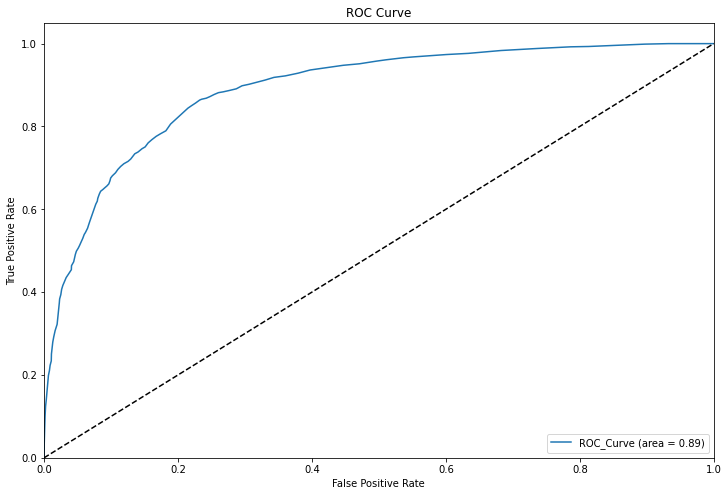

In [79]:
draw_ROC(Y_Train_Predict_Final["Churn_Original"] ,Y_Train_Predict_Final["Churn_Probability"])

### <font color="blue">From the above ROC curve which has <font color="green">89%</font> area under it indicates the model is of good strength</font>

### <font color="blue">From the above 3 metrices graphs above its clear to set the threshold probability for Churn is at </font> <font color="green">best at 0.35</font>  <font color="blue">where Recall is above 80% as per business requirement</font> 

<br>

#### <font color="green">Step - 8:  Checking how this threshold works in Test set</font>

In [80]:
### checking the final colmuns to use in test set to predict
X_Test[cols].head()

,Do Not Email,Total Time Spent on Website,What matters most to you in choosing a course_Not Specified,What is your current occupation_Working Professional,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Notable Activity_Modified
4269,0,0.964504,1,0,0,0,0,0,1,0
2376,0,-0.885371,0,0,1,0,0,0,1,0
7766,0,-0.777416,0,1,0,0,0,1,0,0
9199,0,-0.885371,0,0,0,1,1,0,0,1
4359,0,-0.885371,0,0,1,0,0,0,0,0


In [81]:
### Predict in Test Set
X_Test_sm  = sm.add_constant(X_Test[cols])
Y_Test_Predict = res.predict(X_Test_sm)
Y_Test_Predict = round(Y_Test_Predict , 2)
Y_Test_Predict.head()


4269    0.54
2376    0.95
7766    0.63
9199    0.10
4359    0.86
dtype: float64

In [82]:
### making the dataframe to check model stregth at cutoff at 40%

Y_Test_Predict_Final = pd.DataFrame({"Churn_Original": Y_Test.values , "Churn_Probability": Y_Test_Predict})
Y_Test_Predict_Final["Churn_Predicted"] = Y_Test_Predict_Final["Churn_Probability"].map(lambda x: 1 if x > 0.35 else 0)
Y_Test_Predict_Final.head()

,Churn_Original,Churn_Probability,Churn_Predicted
4269,1,0.54,1
2376,1,0.95,1
7766,1,0.63,1
9199,0,0.10,0
4359,1,0.86,1


In [83]:
### checking the accuracy score

metrics.accuracy_score(Y_Test_Predict_Final["Churn_Original"] ,Y_Test_Predict_Final["Churn_Predicted"] )

0.8152958152958153

<br>

### <font color="green">  So we see the model works well in the test set as well at 0.35 threshold having 81% accuracy of prediction</font>

<br>
<br>

## <font color="blue">Creating the Final List with Lead Score</font>

In [84]:
scale_cols = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
leads_df[scale_cols] = scaler.transform(leads_df[scale_cols])

leads_df_sm  = sm.add_constant(leads_df[cols])
leads_df_Predict = res.predict(leads_df_sm)
leads_df_Predict = round(leads_df_Predict * 100)

In [85]:
### add the churn score column to the original data frame
leads_df_original["Lead_Score"] = leads_df_Predict.astype("int")

In [86]:
### sorting the DF with Lead Numbers highest churn score on top
leads_df_original_final = pd.concat([leads_df_original.iloc[:,0:2] , leads_df_original.iloc[:,-1] , leads_df_original.iloc[:,3:-2]], axis=1)

leads_df_original_final.sort_values(by="Lead_Score",ascending=False).head()

,Prospect ID,Lead Number,Lead_Score,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview
4773,eec1c494-6329-4b35-ab26-9fef63bf2b12,614100,100,Reference,No,No,1,0.0,0,0.0,SMS Sent,NaN,Marketing Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Select,NaN,NaN,NaN,NaN,No,No
5822,d5a9b668-ddad-4795-bf0e-a28390748a90,605216,100,Reference,No,No,1,0.0,0,0.0,SMS Sent,NaN,Finance Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Select,NaN,NaN,NaN,NaN,No,No
5671,623bc6c9-9184-4437-b38f-d374be49d1a3,606508,100,Organic Search,No,No,1,9.0,2125,3.0,SMS Sent,India,Operations Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Select,NaN,NaN,NaN,NaN,No,No
2675,c20320d6-6059-4e80-9b3f-d774442c92c4,633956,100,Reference,No,No,1,0.0,0,0.0,SMS Sent,NaN,Finance Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Select,NaN,NaN,NaN,NaN,No,No
2786,77e26553-3741-4f64-afc2-662de8a7bf72,632926,100,Reference,No,No,1,NaN,1010,NaN,NaN,NaN,Operations Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Potential Lead,Select,02.Medium,01.High,14.0,19.0,No,No


<br>

### <font color="green">  Those Leads whose Lead Score is more than <font color="blue">35</font> has high chance of converting as per the model</font>

<br>

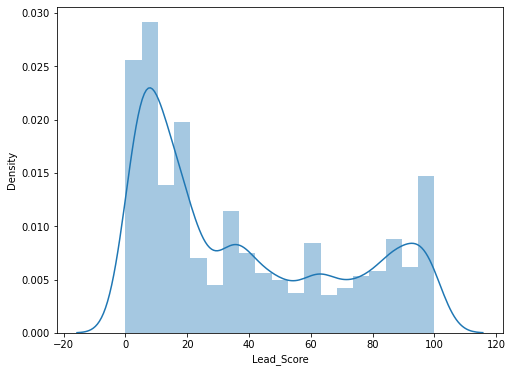

In [87]:
### checking distribution of data based on Lead_Score
plt.figure(figsize=(8,6))
sns.distplot(leads_df_original_final.Lead_Score)
plt.show()

In [88]:
### probable churn to non-churn ratio
non_churn = (leads_df_original_final[leads_df_original_final.Lead_Score < 34].shape[0] * 100)/leads_df_original_final.shape[0]
churn = (leads_df_original_final[leads_df_original_final.Lead_Score >= 34].shape[0] * 100)/leads_df_original_final.shape[0]

print("Probable_Churn VS Probable-Non_Churn ratio is ",round(churn,2),":",round(non_churn,2) )


Probable_Churn VS Probable-Non_Churn ratio is  46.19 : 53.81
